Image Annotation

In [ ]:
#in order to annotate images I used makesense.ai
#two labels used: SLEEPER, CLIP
#the annotated images are attached below.
#after annotating the images I exported the labels separately for train and val and added it to a directory
#with the name "labels"
#I put directories "images" and "labels" in the same directory called "train_data"
#afterwards, I used a Google Collaboratory file for YOLOv5 available on github

In [ ]:
#Importantly, you will see that I have split validation data. This is because we use validation data
#in the training process as well and it would not be correct to use the same validation data for testing.
#I used first 10 pictures of validation in training and last 3 pictures of validation for testing.

Training the model

In [ ]:
#I set up the environment using the following code
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
#I uploaded the directory named "train_data" with both folders "images" and "labels" to Google Collab
#I unzipped it with the following command
!unzip -q ../train_data.zip -d ../

In [ ]:
#I uploaded a file "custom_data.yaml" with the following code

path: ../train_data  # dataset root dir
train: images/train  # train images (relative to 'path') 53 images
val: images/val  # val images (relative to 'path') 13 images

# number of classes
nc: 2

# Classes
names:
  0: SLEEPER
  1: CLIP

In [ ]:
#afterwards, I ran the following code
# Train YOLOv5s on train_data for 60 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

Results

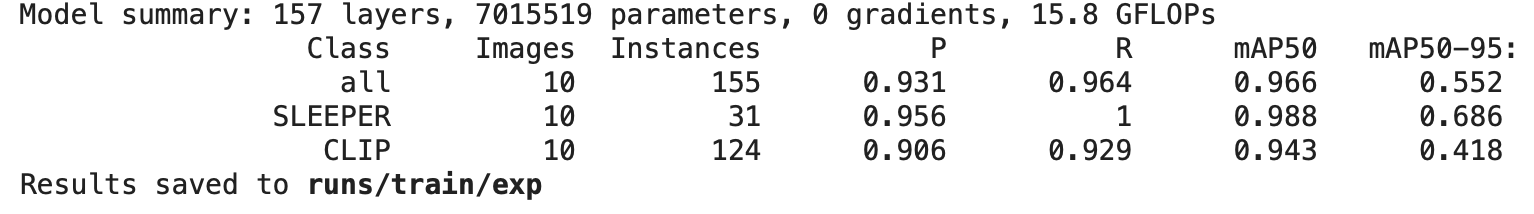

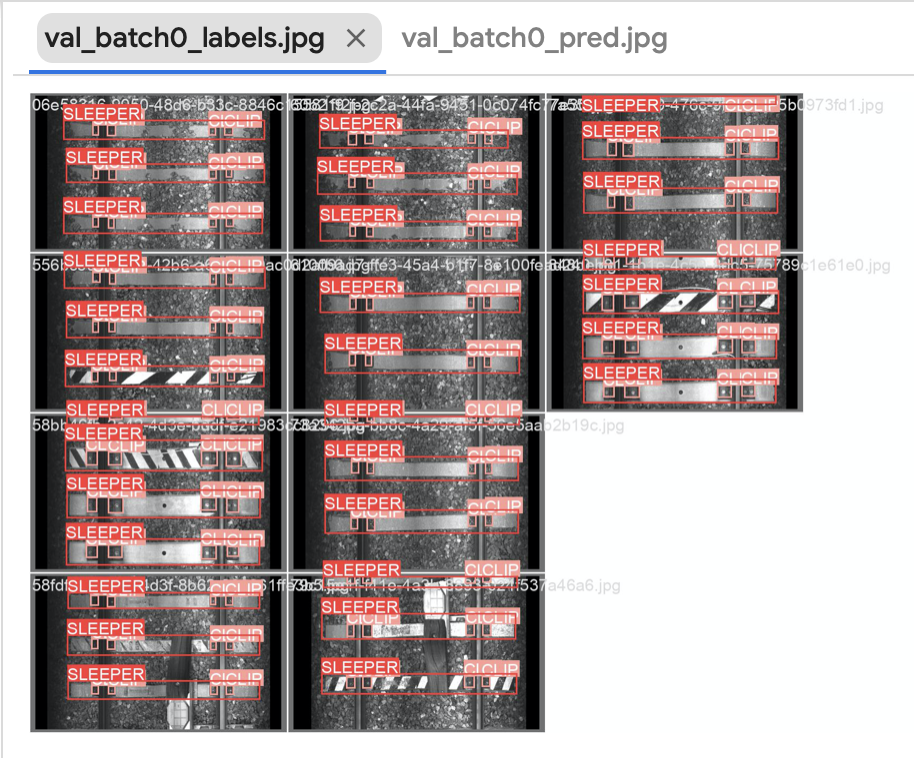

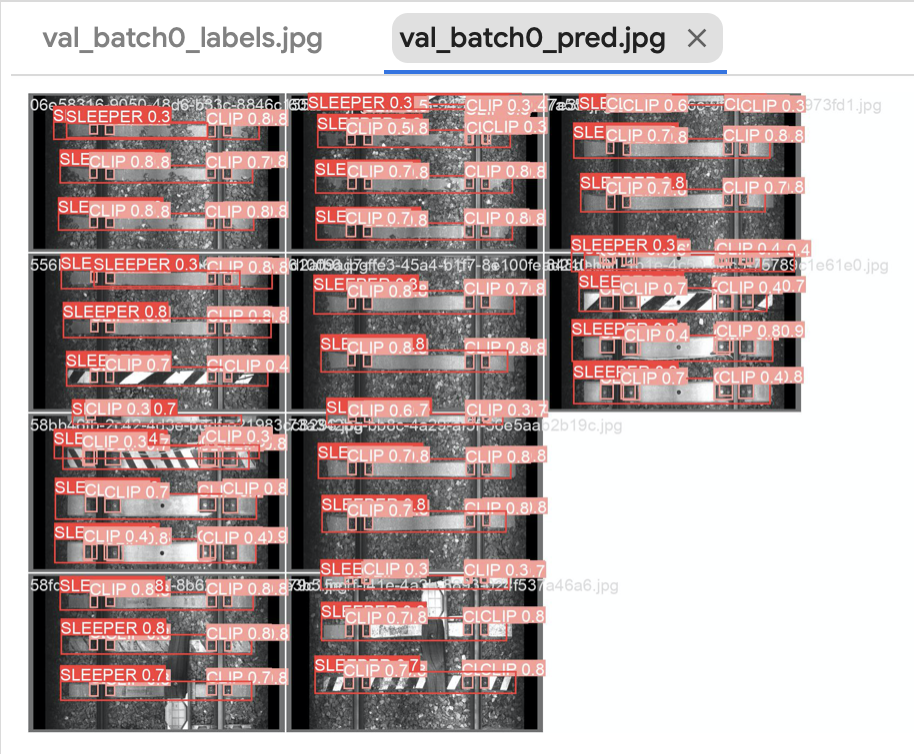

In [1]:
#you can observe the results below

from PIL import Image
from IPython.display import display

# Load image from file
image = Image.open("/Users/macbookpro16/Desktop/mr.png")
image1 = Image.open("/Users/macbookpro16/Desktop/vbl.png")
image2 = Image.open("/Users/macbookpro16/Desktop/vbp.png")

# Display image
display(image)
display(image1)
display(image2)

#after training, the model shows to gave 0.963 accuracy on all classes
#val_batch0_labels.jpg demonstrates the labeled images in valuation dataset, while val_batch0_pred.jpg
#demonstrates the predicted labels

In [ ]:
#afterwards, I ran inference on the trained custom model with the following command
#please note that I updated the weights based on the results of the previous model
#also please note that the inference done is on three images that I took out from the training val
#and saved specifically for inference
#I uploaded test_data with three images and unzipped the folder
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source ../test_data

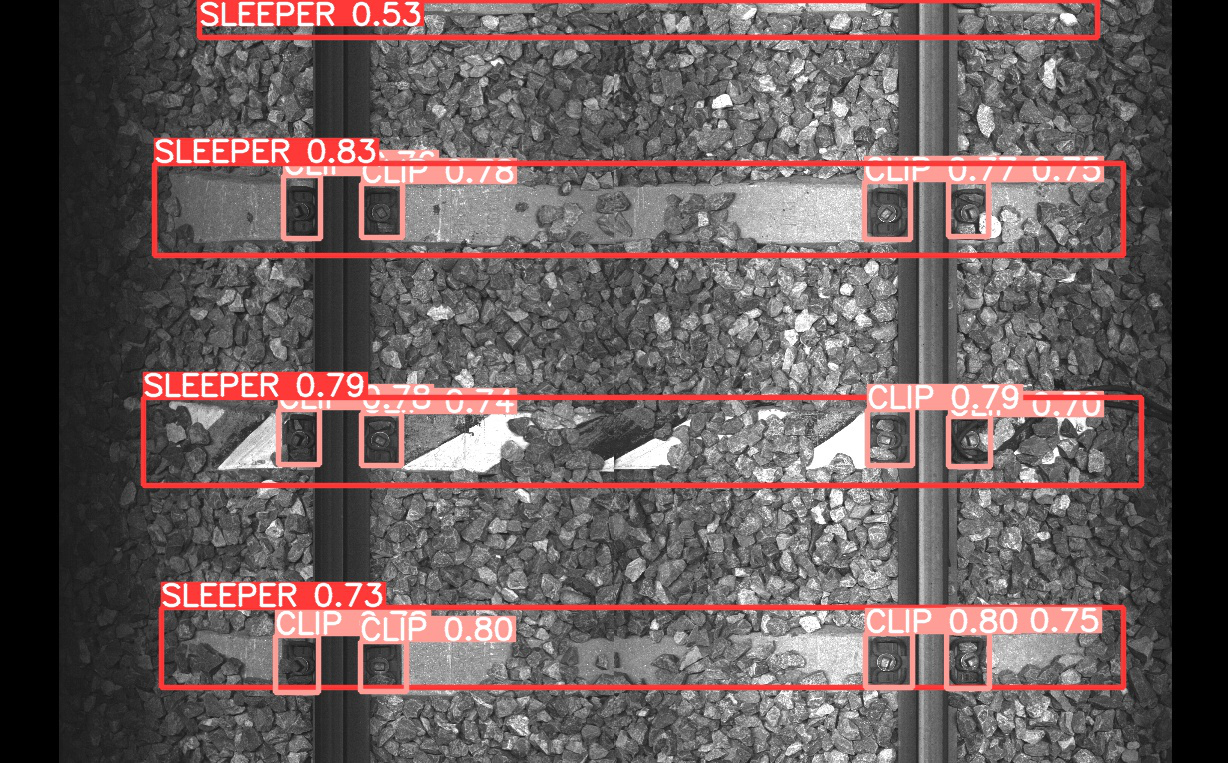

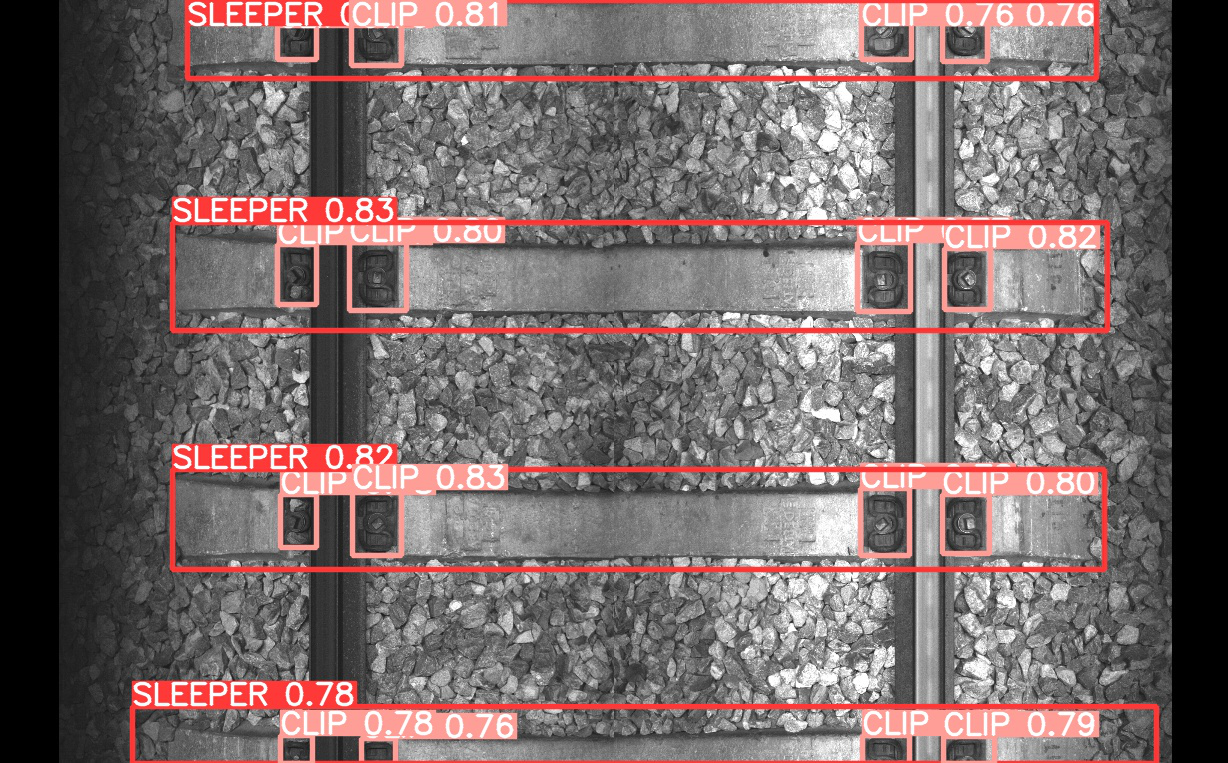

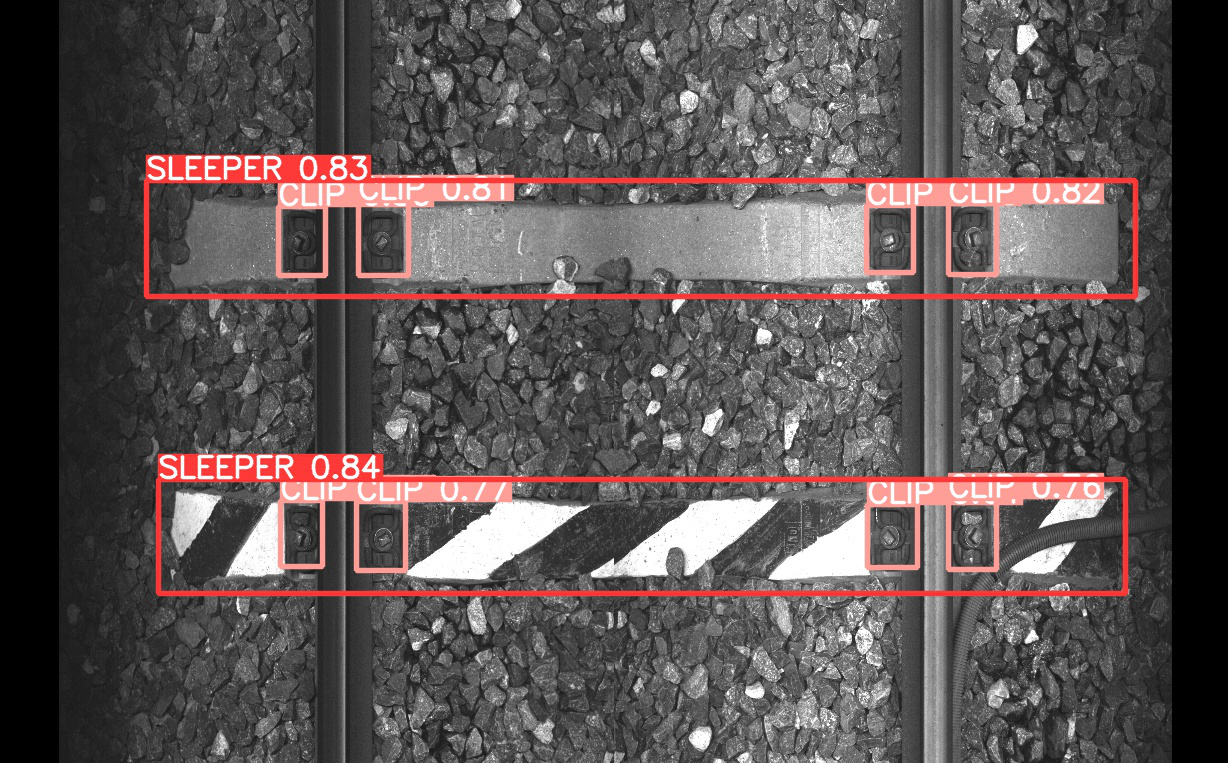

In [4]:
#see the results below

from PIL import Image
import os

folder_path = '/Users/macbookpro16/Desktop/results'

images = []

# loop through all files in the folder
for filename in os.listdir(folder_path):
    # check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # open the image using Pillow
        img = Image.open(os.path.join(folder_path, filename))
        # append the image to the list of images
        images.append(img)

# display the images in Jupyter Notebook
for img in images:
    display(img)

In [ ]:
#afterwards, I validate the model with the following command
#please note that the weights are updated from training
!python val.py --weights runs/train/exp2/weights/best.pt --data custom_data.yaml --img 640 --half

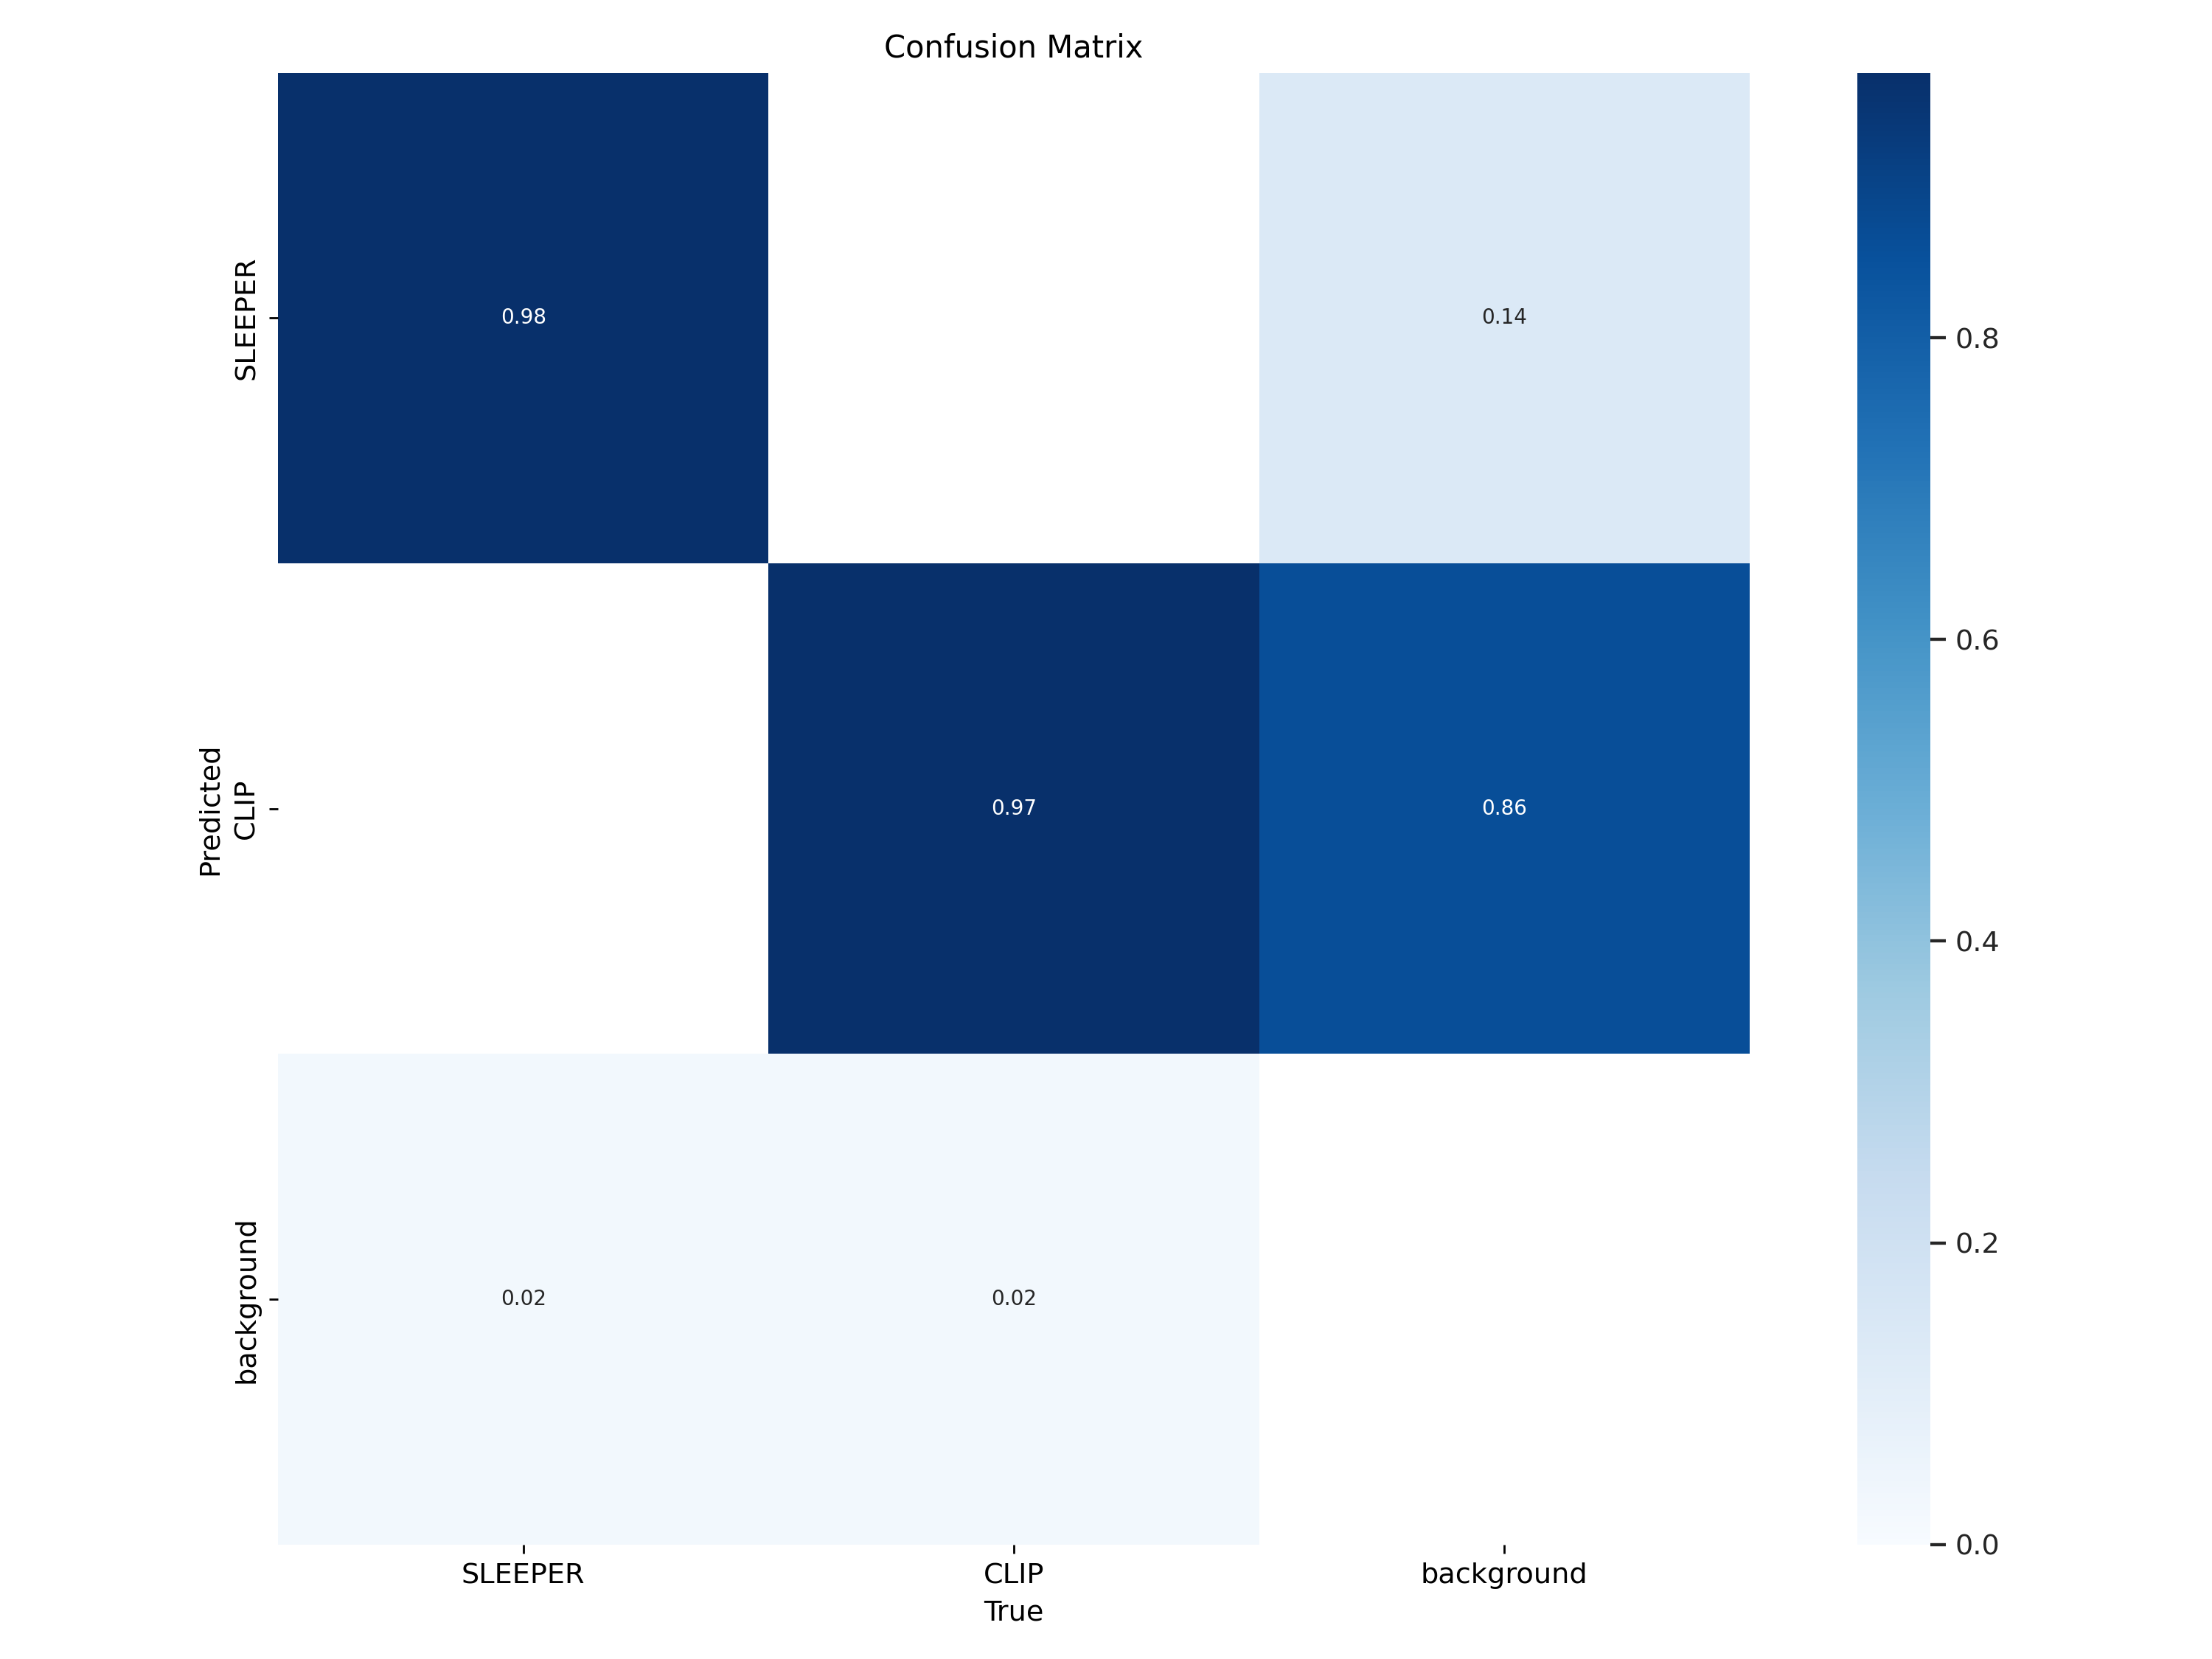

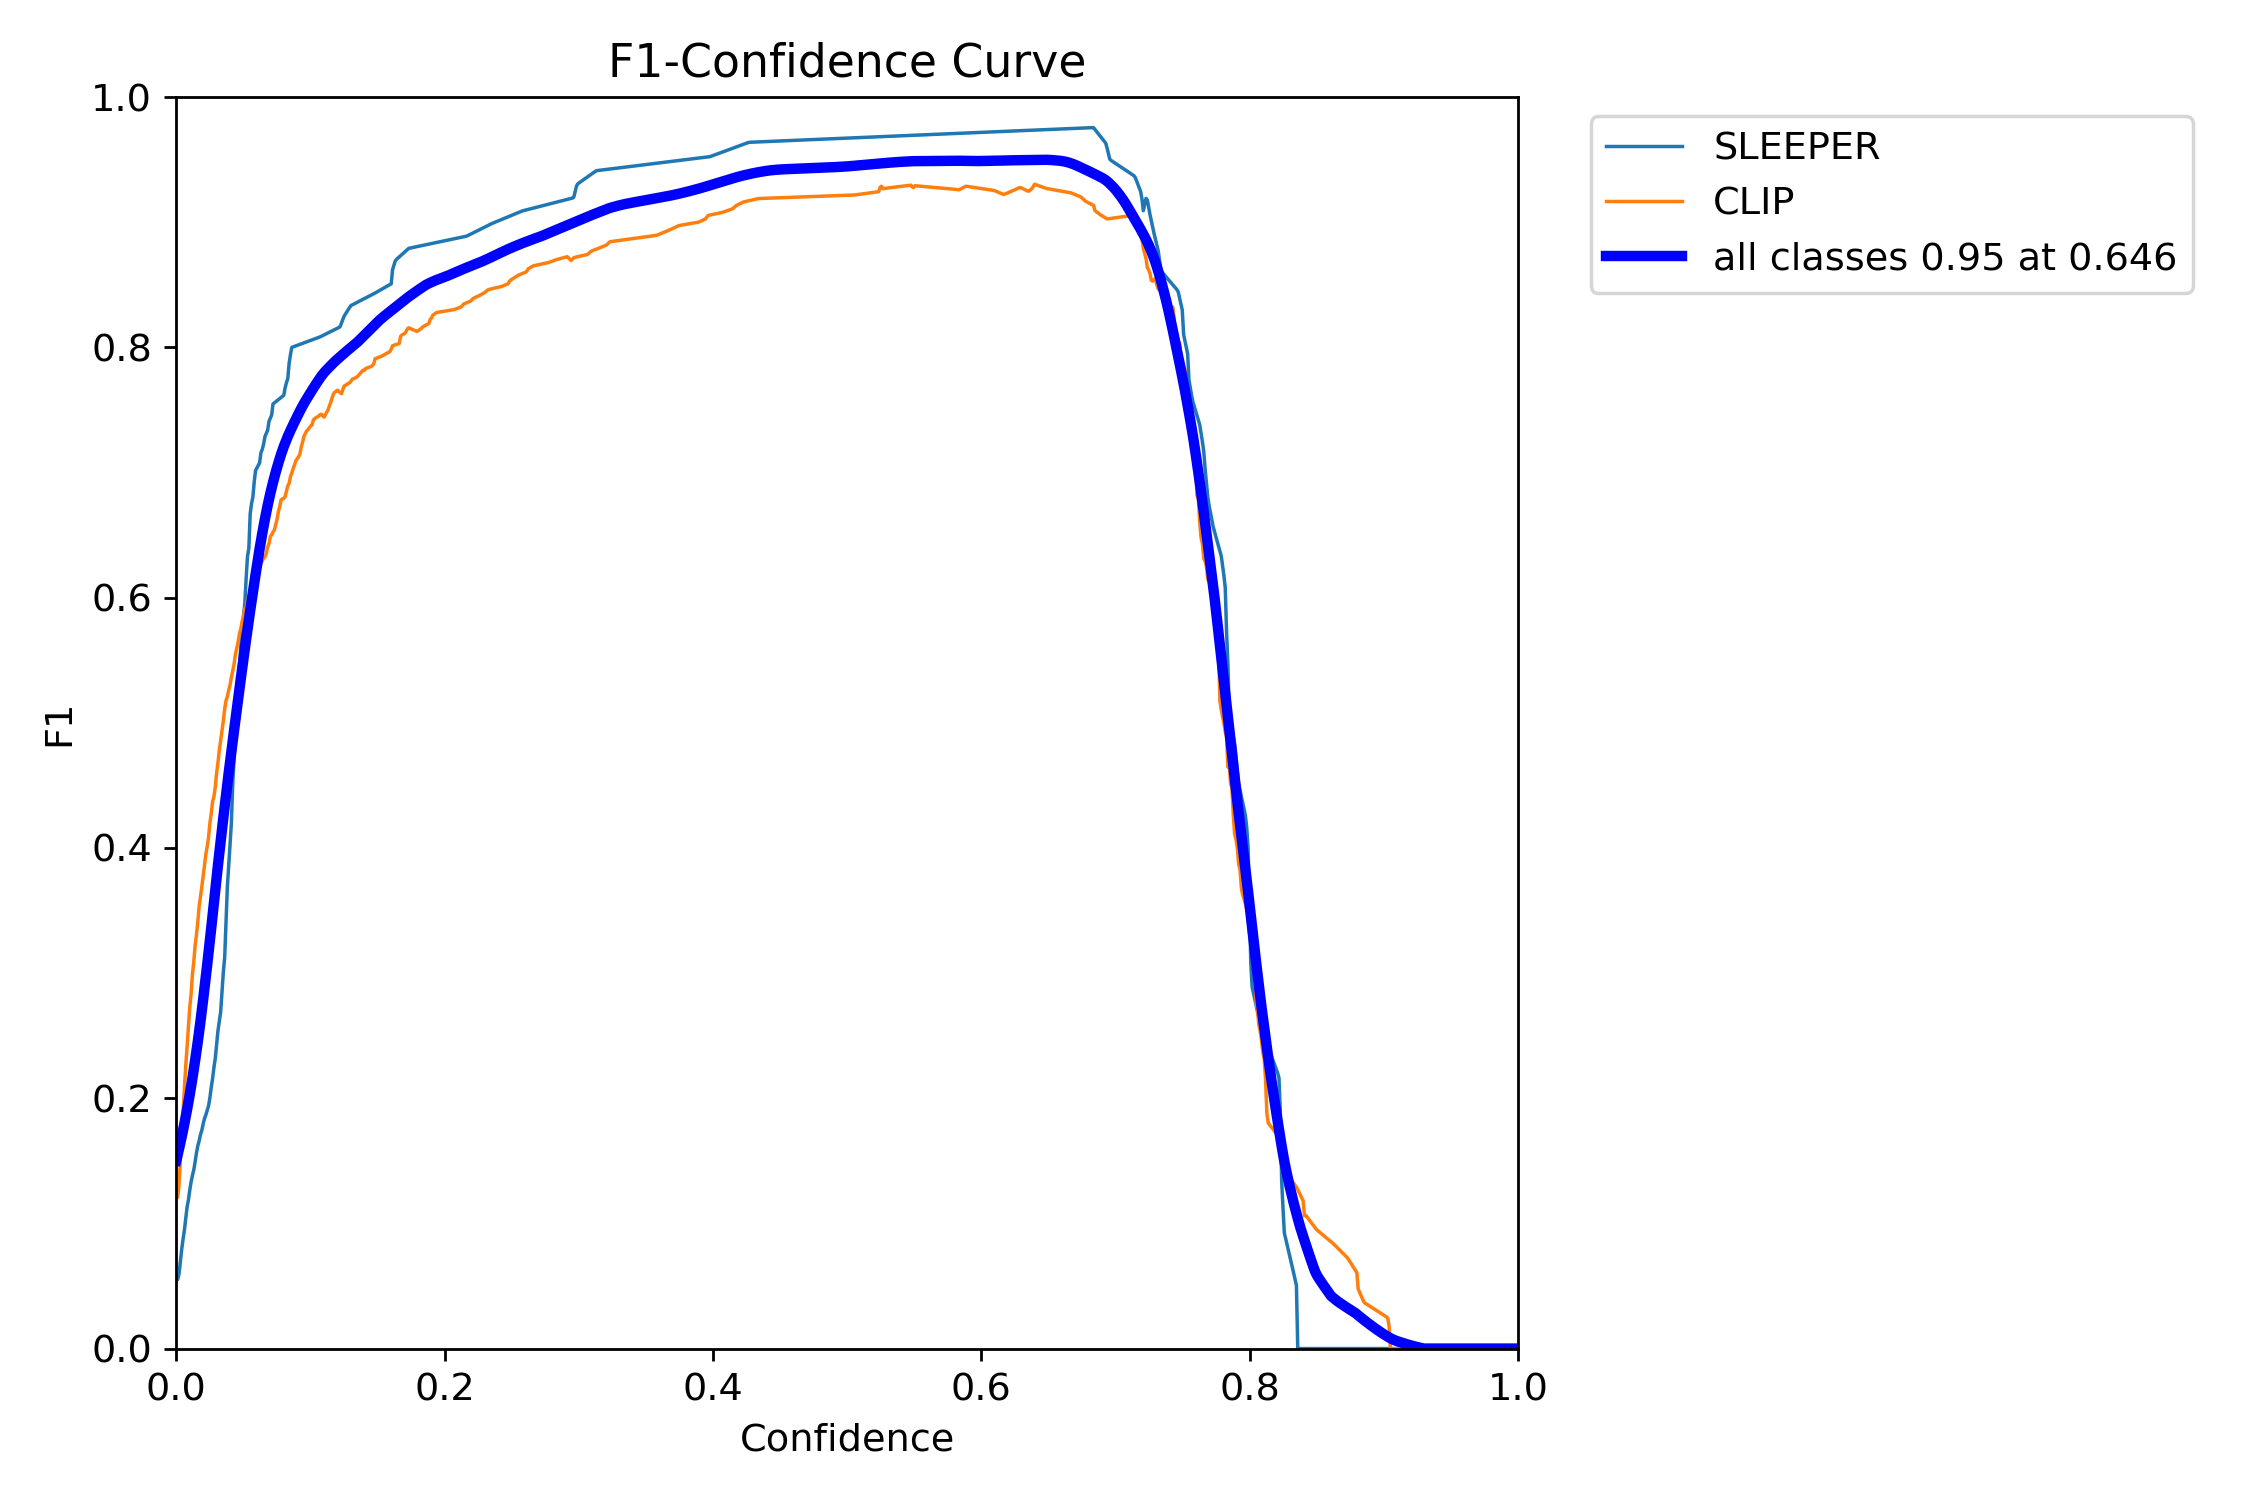

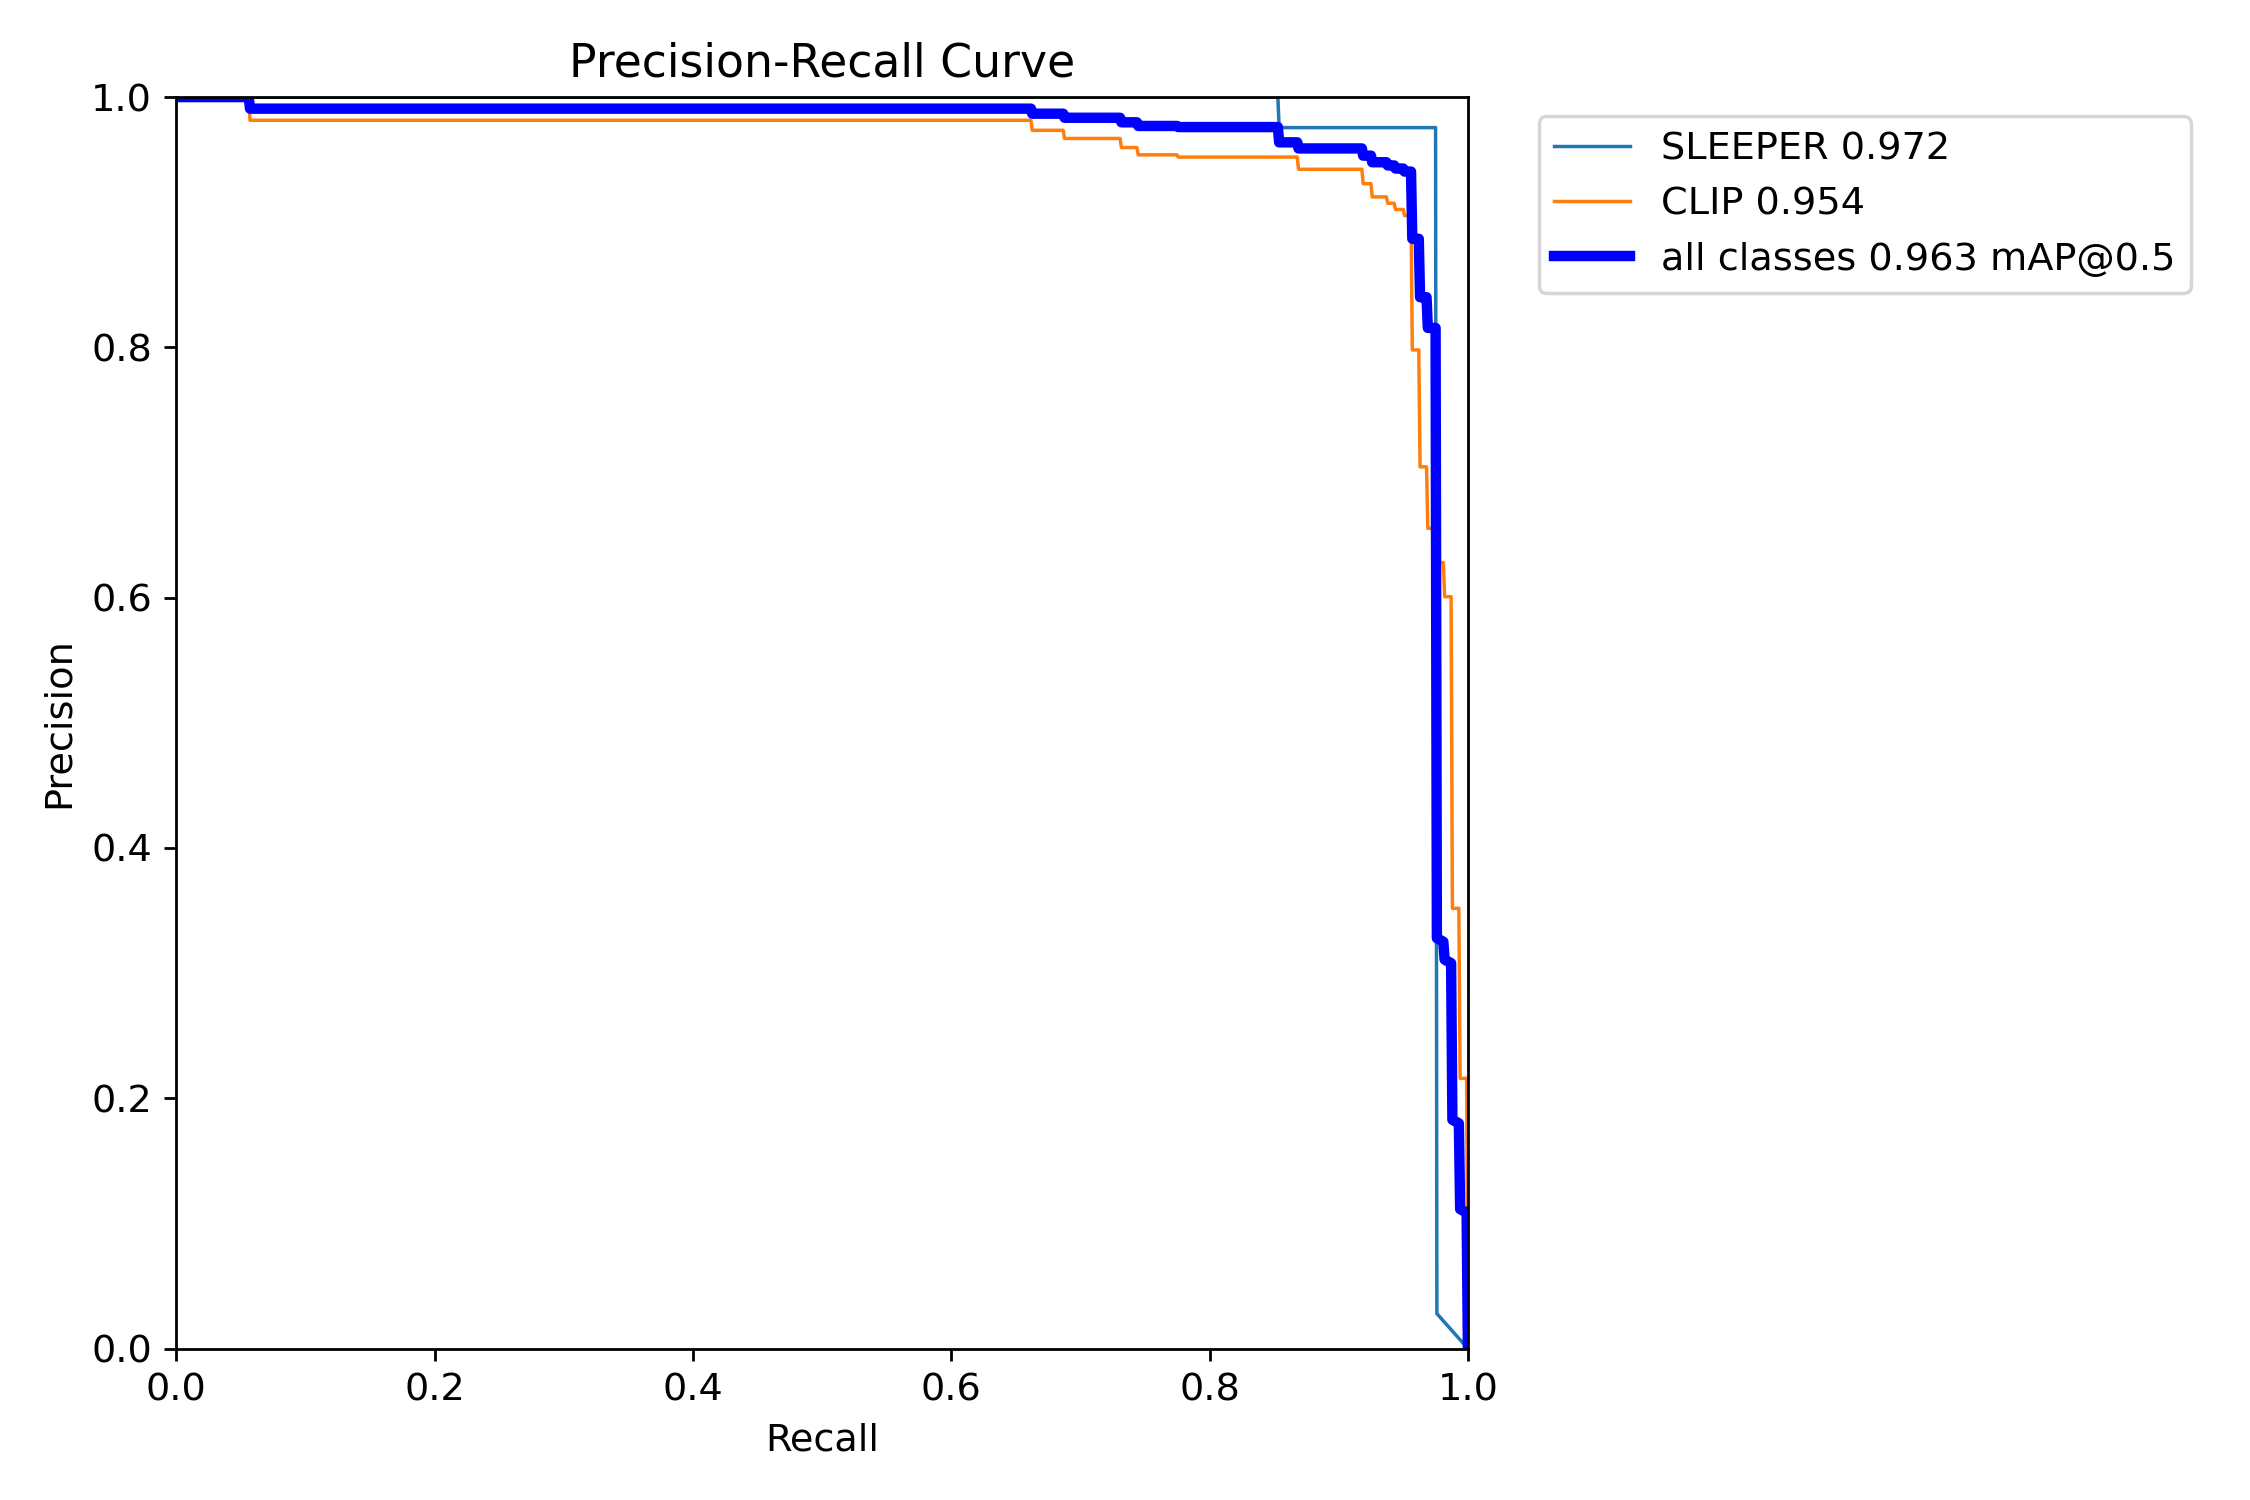

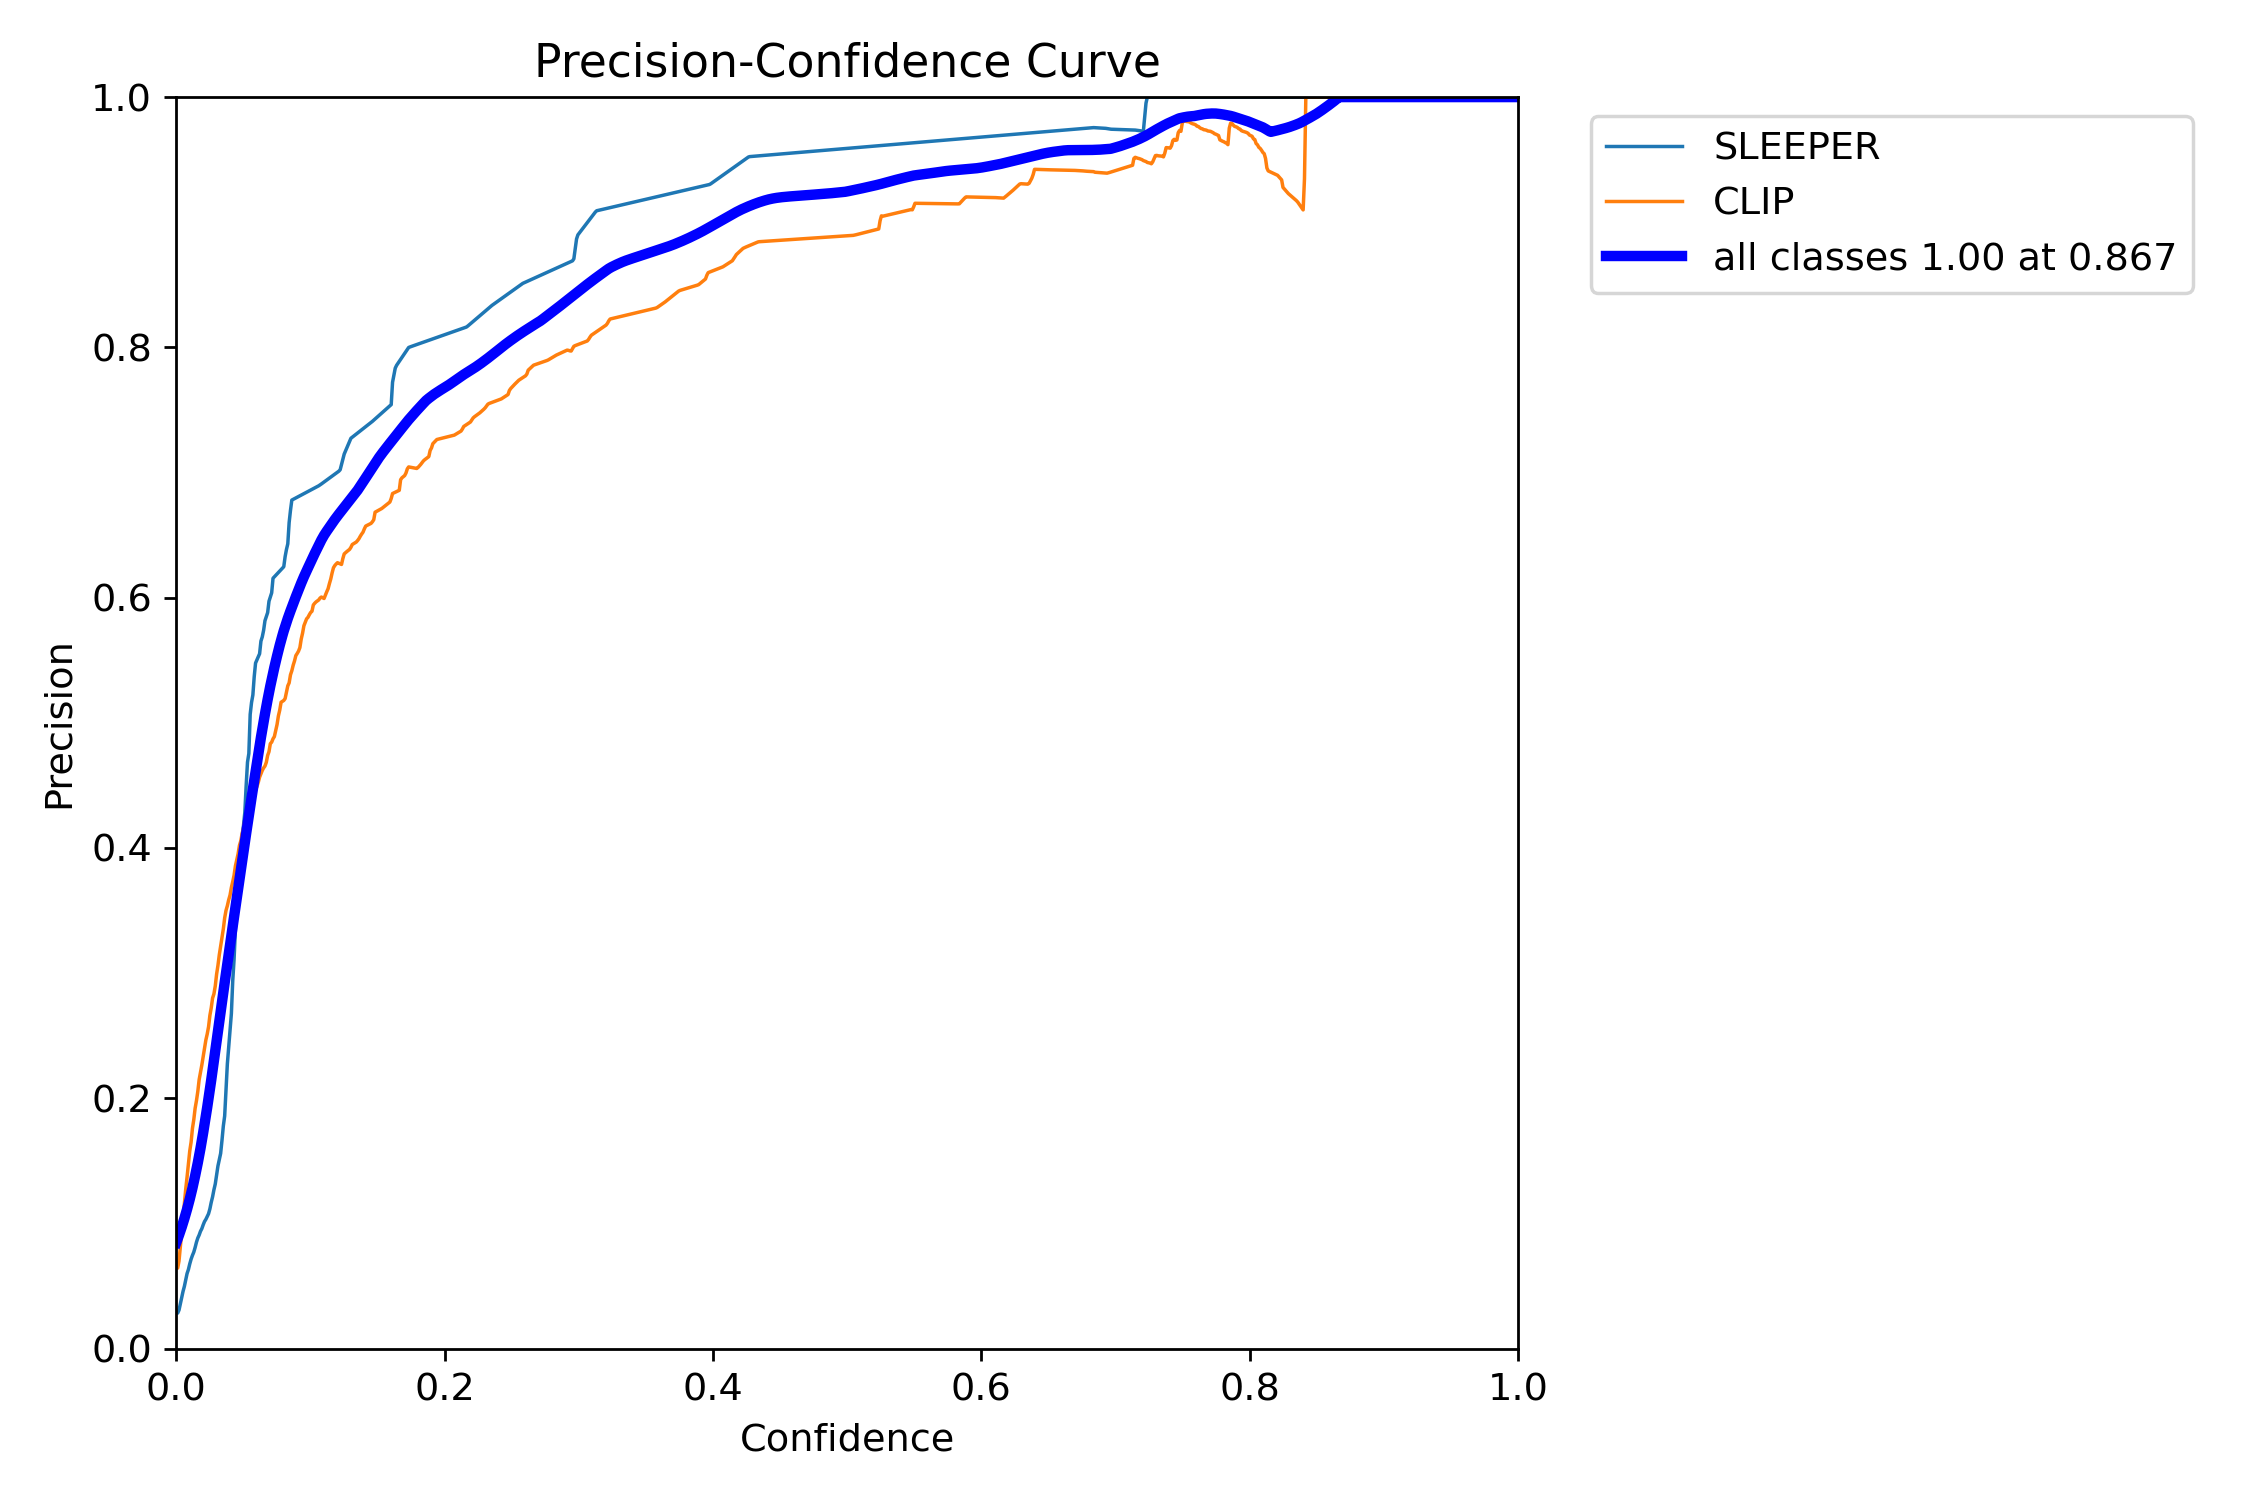

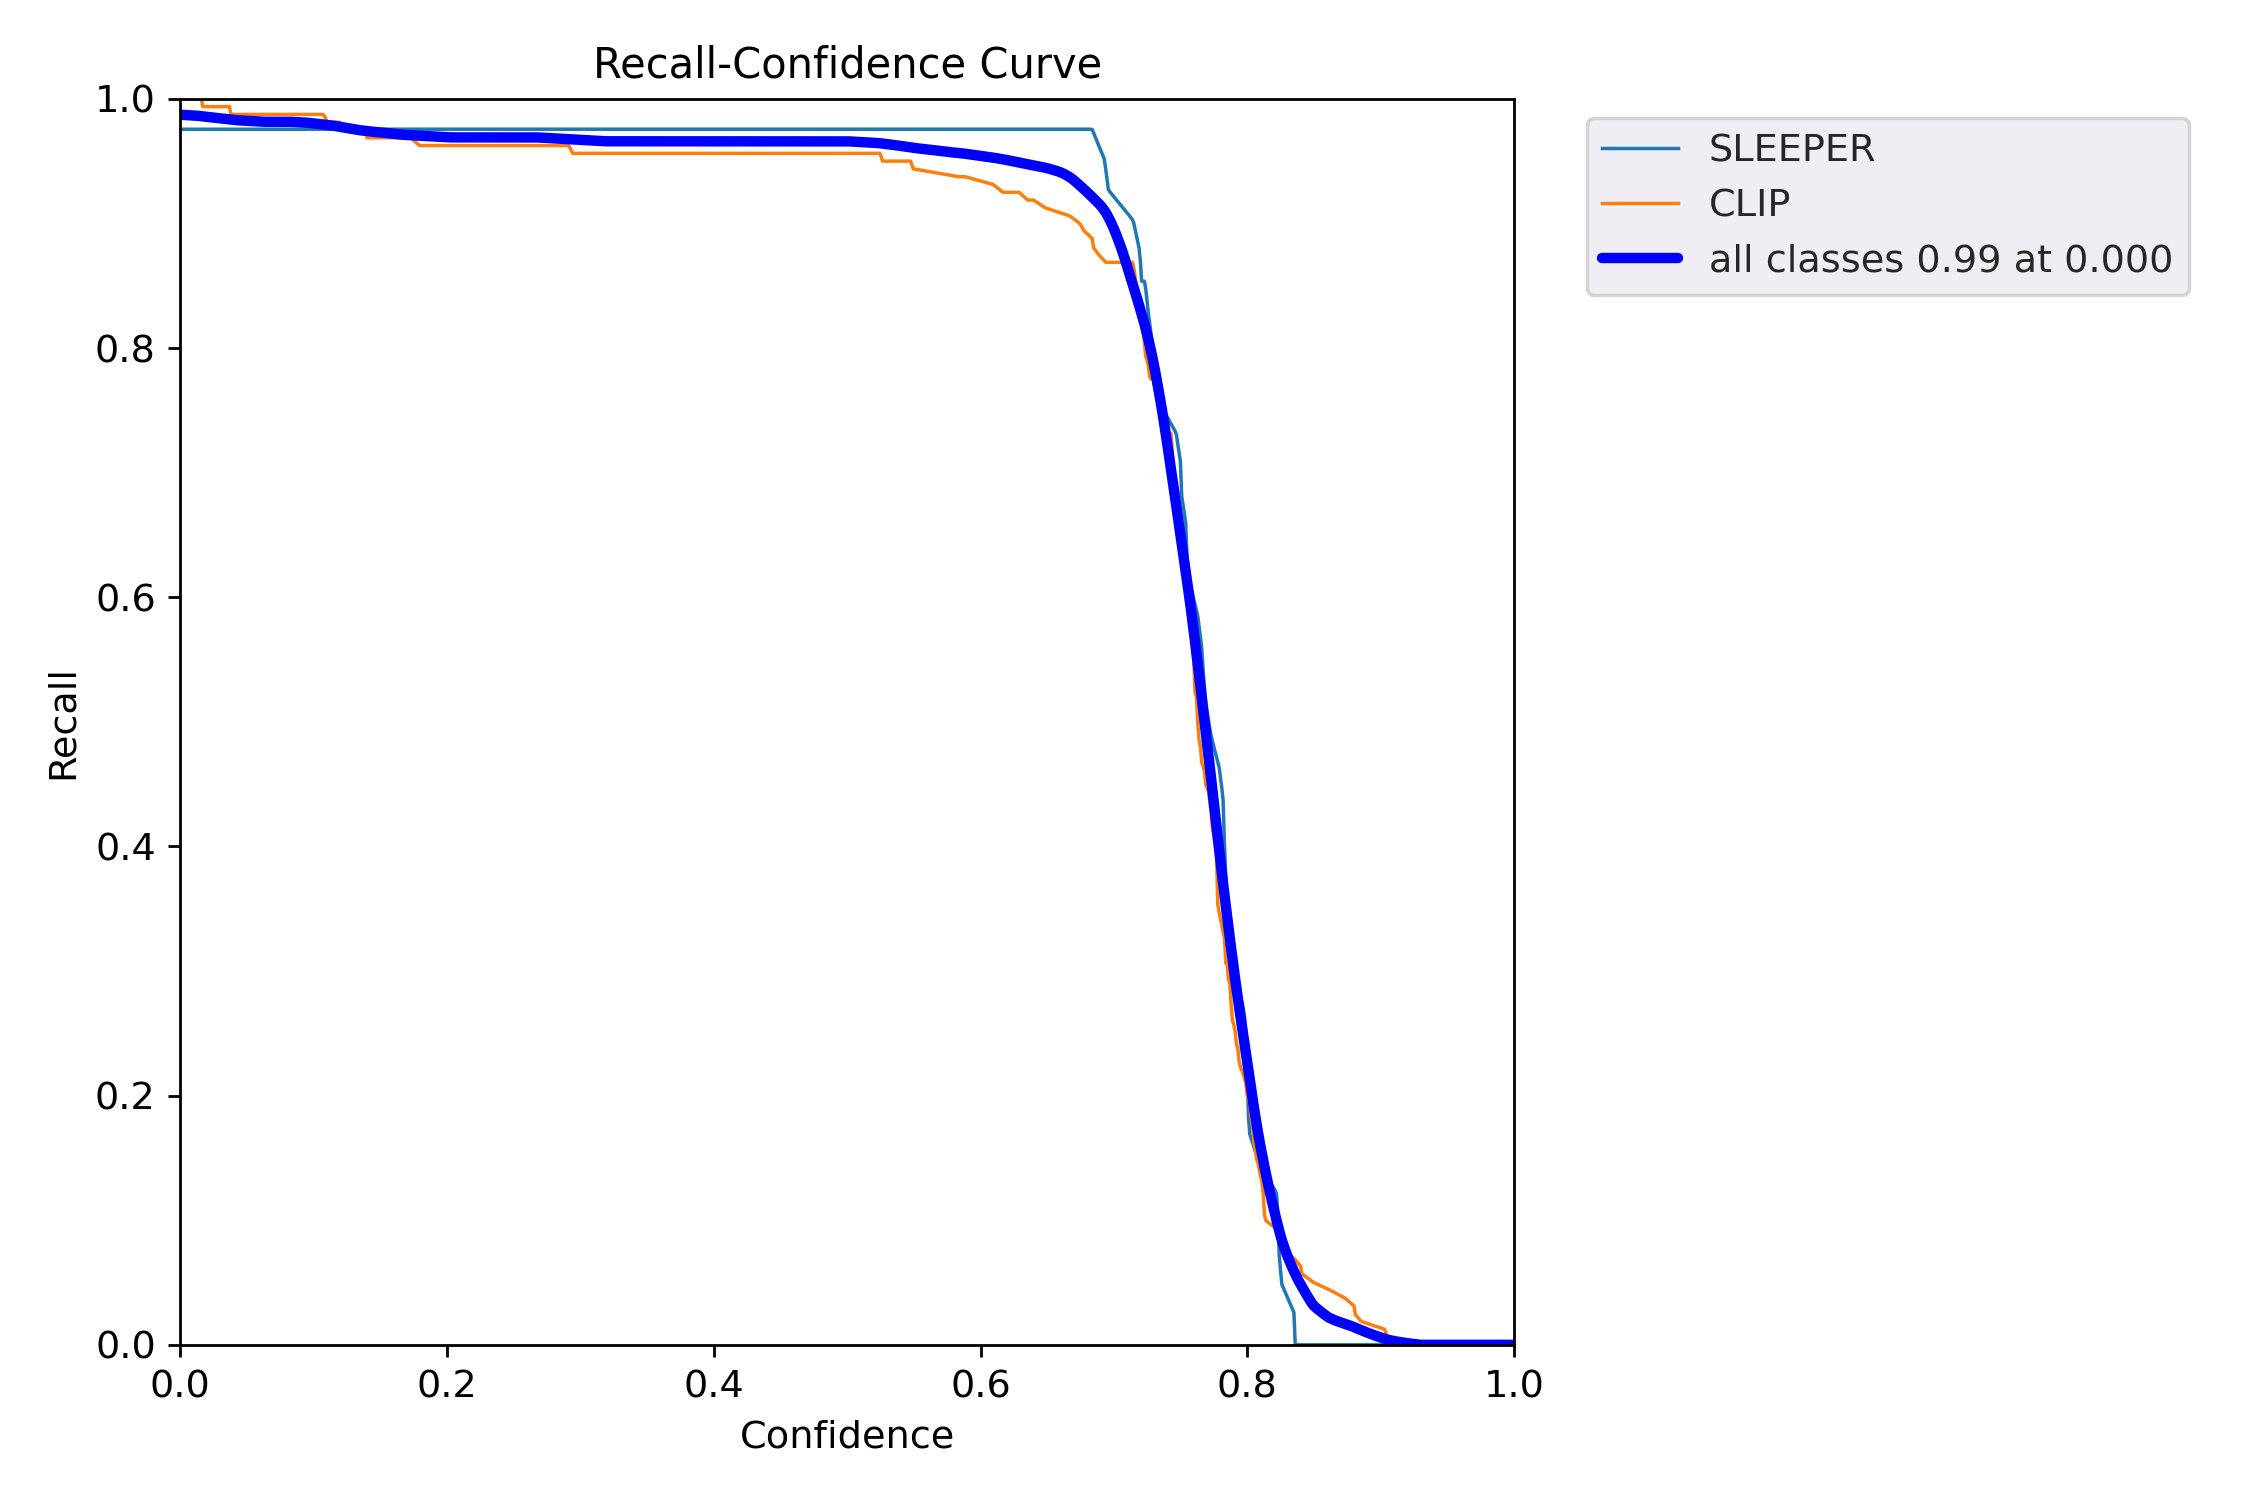

In [68]:
#see the results below

# Load image from file
conf = Image.open("/Users/macbookpro16/Downloads/confusion_matrix.png")
f1 = Image.open("/Users/macbookpro16/Downloads/F1_curve.png")
pr = Image.open("/Users/macbookpro16/Downloads/PR_curve.png")
p = Image.open("/Users/macbookpro16/Downloads/P_curve.png")
r = Image.open("/Users/macbookpro16/Downloads/R_curve.png")


# Display image
display(conf)
display(f1)
display(pr)
display(p)
display(r)

#it can be observed that the model performed very well, with SLEEPER true positive of 0.98 and 
#CLIP true positive of 0.97